In [11]:
# good

In [85]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns

import matplotlib.cm as cm

# Read and load the obesity dataset
obesity_df = pd.read_csv("obesity.csv")
obesity_df.head()

,ID,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,BMI,Weight classification
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.4,Normal
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.2,Normal
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.8,Normal
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.9,Overweight
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.3,Overweight


### DATA CLEANING AND EXPLORATION

In [13]:
# Display basic information about the obesity dataset
#finding missing values
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   float64
 3   Height(m)                       2111 non-null   float64
 4   Weight(kg)                      2111 non-null   float64
 5   Fhx of Overweight               2111 non-null   object 
 6   Freq High Calorie Cons          2111 non-null   object 
 7   Freq vegetable cons             2111 non-null   float64
 8   Number of Main Meals            2111 non-null   float64
 9   Eating inbetween meals          2111 non-null   object 
 10  Hx of smoking                   2111 non-null   object 
 11  Water consumption               2111 non-null   float64
 12  Calorie Consumption Monitoring  21

In [14]:
# Generate descriptive statistics
obesity_df.describe().round(2)


,ID,Age,Height(m),Weight(kg),Freq vegetable cons,Number of Main Meals,Water consumption,Freq of Physical Activity,Time spent on Tech devices,BMI
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,1055.00,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66,29.70
std,609.54,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61,8.02
min,0.00,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00,13.00
25%,527.50,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00,24.30
50%,1055.00,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63,28.70
75%,1582.50,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00,35.95
max,2110.00,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00,50.80


In [15]:
#determining categorical data
categorical = obesity_df.dtypes[obesity_df.dtypes == "object"].index
print(categorical)

obesity_df[categorical].describe()


Index(['Gender', 'Fhx of Overweight', 'Freq High Calorie Cons',
       'Eating inbetween meals', 'Hx of smoking',
       'Calorie Consumption Monitoring', 'Alcohol consumption',
       'Transportation used', 'Weight classification'],
      dtype='object')


,Gender,Fhx of Overweight,Freq High Calorie Cons,Eating inbetween meals,Hx of smoking,Calorie Consumption Monitoring,Alcohol consumption,Transportation used,Weight classification
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,4
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obese
freq,1068,1726,1866,1765,2067,2015,1401,1580,973


In [16]:
#renaming columns for easy use
obesity_df= obesity_df.rename(columns={"family_history_with_overweight": "Fhx of Overweight",
                                      "FAVC(Frequent Consumption of  High Caloric Food)":"Freq High Calorie Cons",
                                      "CAEC( Consumption of Food Between Meals)":"Eating inbetween meals",
                                      "SCC(Caloric  Consumption Monitoring)":"Calorie Consumption Monitoring",
                                      "CALC( Consumption of Alcohol)":"Alcohol consumption",
                                      "MTRANS(Transportation Use)":"Transportation used",
                                      "Nobeyesdad(Classification of Weight)":"Weight group",
                                      "FCVC(Frequency of consumption of Vegetables)":"Freq vegetable cons",
                                      "NCP( Number of Main Meals)":"Number of Main Meals",
                                      "SMOKE":"Hx of smoking",
                                      "CH2O(Consumption of Water)":"Water consumption",
                                     "FAF( Physical Activity Frequency)":"Freq of Physical Activity",
                                      "TUE(Time Using Technology Devices)":"Time spent on Tech devices"})
obesity_df.head()

,ID,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,BMI,Weight classification
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.4,Normal
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.2,Normal
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.8,Normal
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.9,Overweight
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.3,Overweight


In [17]:
#calclating BMI for each datapoint and creating a new column for that information
BMI= obesity_df["Weight(kg)"]/(obesity_df["Height(m)"]**2)
obesity_df["BMI"] = round(BMI,1)  
obesity_df.head()

,ID,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,BMI,Weight classification
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.4,Normal
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.2,Normal
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.8,Normal
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.9,Overweight
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.3,Overweight


In [18]:
#Classifying weight
for i in obesity_df["BMI"]:
    if i < 18.5:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Underweight"
    elif i <= 24.9:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Normal"
    elif i <= 29.9:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Overweight"
    else:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Obese"

obesity_df



,ID,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,BMI,Weight classification
0,0,Female,21.00,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,24.4,Normal
1,1,Female,21.00,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,24.2,Normal
2,2,Male,23.00,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,23.8,Normal
3,3,Male,27.00,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,26.9,Overweight
4,4,Male,22.00,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,28.3,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,44.9,Obese
2107,2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,43.7,Obese
2108,2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,43.7,Obese
2109,2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,44.0,Obese


In [19]:
filepath = "..\output"
obesity_df.to_csv(filepath, index_label="ID")

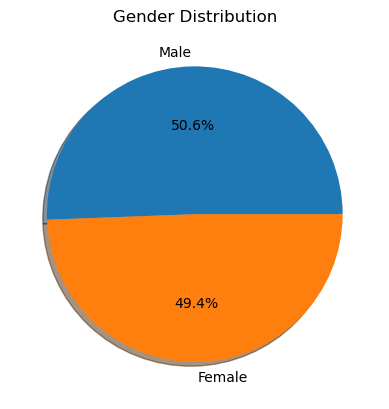

In [20]:
labels=["Male","Female"]
plt.pie(obesity_df["Gender"].value_counts(), autopct = "%1.1f%%", labels=labels, shadow = True)
plt.title("Gender Distribution")
plt.show()

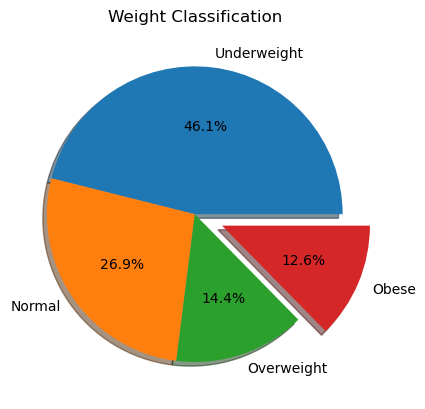

In [21]:
labels=["Underweight","Normal","Overweight","Obese"]
explode = [0,0,0,0.2]
plt.pie(obesity_df["Weight classification"].value_counts(), autopct = "%1.1f%%",shadow = True, labels=labels, explode = explode)
plt.title("Weight Classification")
plt.show()

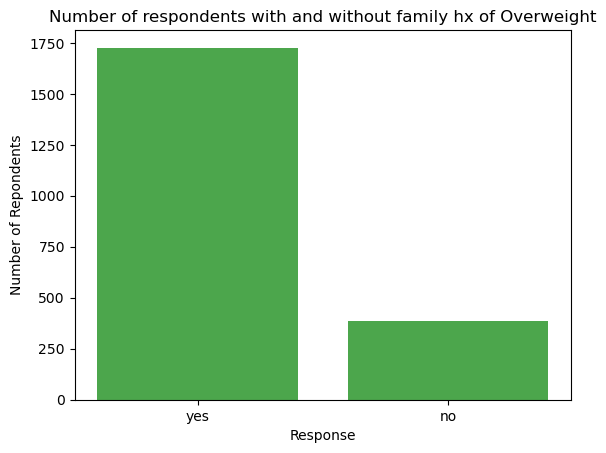

In [22]:
# assessing the extent of family hx of overweight, since family history is the only non modifiable factor being analysed.
x= np.arange(2)
xticks= ("yes", "no")
plt.bar(x,obesity_df["Fhx of Overweight"].value_counts(), color = "g", alpha = 0.7)
plt.xticks(x, xticks)
plt.xlabel("Response")
plt.ylabel("Number of Repondents")
plt.title("Number of respondents with and without family hx of Overweight")
plt.show()

### ANALYSIS

In [23]:
# is there a linear relationship between weight and height

In [24]:
#of those with family history of overweight, what are their weight classifications?

# studying  Obese patients

In [25]:
print(obesity_df.count())

ID                                2111
Gender                            2111
Age                               2111
Height(m)                         2111
Weight(kg)                        2111
Fhx of Overweight                 2111
Freq High Calorie Cons            2111
Freq vegetable cons               2111
Number of Main Meals              2111
Eating inbetween meals            2111
Hx of smoking                     2111
Water consumption                 2111
Calorie Consumption Monitoring    2111
Freq of Physical Activity         2111
Time spent on Tech devices        2111
Alcohol consumption               2111
Transportation used               2111
BMI                               2111
Weight classification             2111
dtype: int64


In [68]:
#select data for ony overweight and obese candidates
obese_candidates_df = obesity_df.loc[obesity_df["Weight classification"] == "Obese"]
obese_candidates_df


,ID,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,BMI,Weight classification
10,10,Male,26.00,1.85,105.00,yes,yes,3.0,3.0,Frequently,no,3.00,no,2.00,2.00,Sometimes,Public_Transportation,30.7,Obese
13,13,Male,41.00,1.80,99.00,no,yes,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Automobile,30.6,Obese
17,17,Female,29.00,1.53,78.00,no,yes,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,no,Automobile,33.3,Obese
21,21,Female,52.00,1.69,87.00,yes,yes,3.0,1.0,Sometimes,yes,2.00,no,0.00,0.00,no,Automobile,30.5,Obese
23,23,Female,22.00,1.60,82.00,yes,yes,1.0,1.0,Sometimes,no,2.00,no,0.00,2.00,Sometimes,Public_Transportation,32.0,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,44.9,Obese
2107,2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,43.7,Obese
2108,2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,43.7,Obese
2109,2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,44.0,Obese


In [67]:
print(obese_candidates_df.columns)

Index(['ID', 'Gender', 'Age', 'Height(m)', 'Weight(kg)', 'Fhx of Overweight',
       'Freq High Calorie Cons', 'Freq vegetable cons', 'Number of Main Meals',
       'Eating inbetween meals', 'Hx of smoking', 'Water consumption',
       'Calorie Consumption Monitoring', 'Freq of Physical Activity',
       'Time spent on Tech devices', 'Alcohol consumption',
       'Transportation used', 'BMI', 'Weight classification'],
      dtype='object')


## Does deitary habit have any influence on obesity risk?

In [27]:
# how many of them have good deitary habits(ie eating vegetables,water consuption, calorie counting?)

In [28]:
# how many of them have poor deitary habits(ie eating between meals, high calorie consumption,)

## Do smoking and alcohol consumption have any influence on obesity risk?

In [29]:
#for those,how many smoke and drink alcohol(lifestyle) for each weight class

In [30]:
# does smoking have any correlation with risk of obesity?- linear reg, determine r value

In [31]:
# does alcohol consumption have any correlation with risk of obesity?- linear reg, determine r value, ttests, chi square

## Does physical activity have any influence on obesity risk?

In [155]:
obese_count = obese_candidates_df.groupby(['Transportation used'])['Time spent on Tech devices']
obese_count


In [152]:
# how many of them have low physical activity (ie time spent on tech devices- >1 , transport means- public, driving,etc)
obese_candidates_df = obesity_df.loc[obesity_df["Weight classification"] == "Obese"]
obese_candidates_df.columns
# This code below identifies and counts obese individuals in the data who exhibit characteristics of low physical activity based on time spent on devices AND transportation used.
low_activity_df = obese_candidates_df.loc[
    (obese_candidates_df['Time spent on Tech devices'] > 1) &  # Time spent on devices > 1
    (obese_candidates_df['Transportation used'].isin(['Public Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']))
]
number_low_activity = low_activity_df.shape[0]

print(f"Number of obese candidates with low physical activity: {number_low_activity}")

Number of obese candidates with low physical activity: 36


Correlation between Frequency of Physical Activity and BMI: -0.07, p-value: 0.02
LinregressResult(slope=-0.4277982052394408, intercept=37.339110061949874, rvalue=-0.07258208977040075, pvalue=0.023566376897097552, stderr=0.18864829517790957, intercept_stderr=0.22057065723117739)


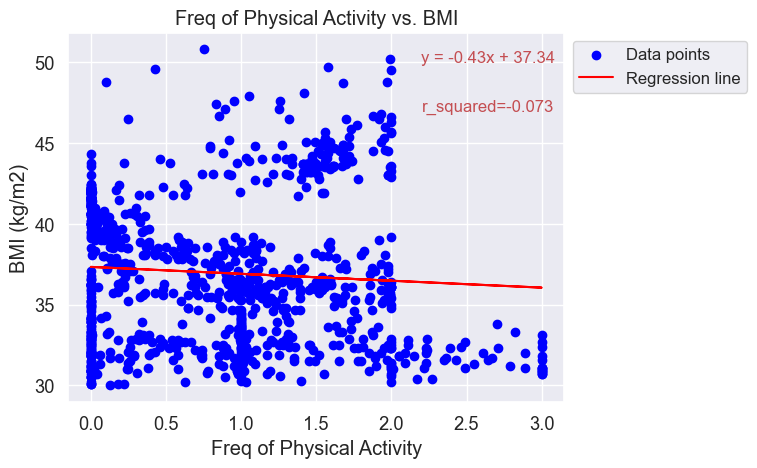

In [104]:
# does physical activity have any correlation with risk of obesity?- linear reg, determine r value
# Analyze correlation between physical activity and BMI
correlation, p_value = pearsonr(obese_candidates_df ['Freq of Physical Activity'], obese_candidates_df ['BMI'])
print(f"Correlation between Frequency of Physical Activity and BMI: {correlation:.2f}, p-value: {p_value:.2f}")

x_values = obese_candidates_df ["Freq of Physical Activity"]
y_values = obese_candidates_df ["BMI"]

# Perform linear regression calculations
regress_values = stats.linregress(x_values, y_values)
slope = regress_values.slope
intercept = regress_values.intercept
print(regress_values)

# Equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
 
# Scatter plot
plt.scatter(x_values, y_values, color="blue", label="Data points")
plt.plot(x_values, slope * x_values + intercept, color="red", label="Regression line")
plt.xlabel("Freq of Physical Activity")
plt.ylabel("BMI (kg/m2)")
plt.title("Freq of Physical Activity vs. BMI")
plt.annotate(equation,(2.2,50), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (2.2,47), fontsize=12, color='r')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))

plt.show()

The slope = 0.145, intercept = 36.875
LinregressResult(slope=0.14548892151673745, intercept=36.875069596381806, rvalue=0.017457890320392983, pvalue=0.586507187595543, stderr=0.2674005875049725, intercept_stderr=0.2174668019049134)


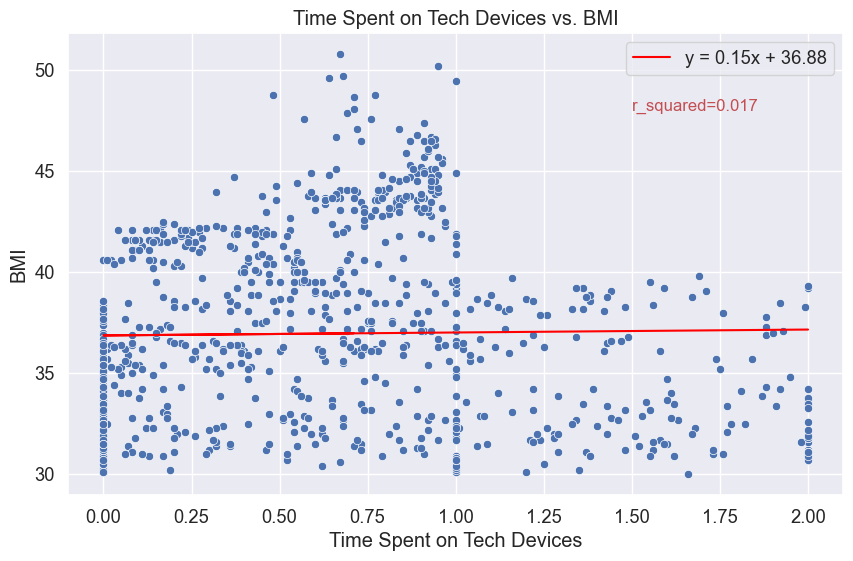

In [133]:
# Scatter plot of Time Spent on Devices vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Time spent on Tech devices", y="BMI", data=obese_candidates_df)
plt.title("Time Spent on Tech Devices vs. BMI")
plt.xlabel("Time Spent on Tech Devices")
plt.ylabel("BMI")

# Calculate the coefficients (slope and intercept) for the linear regression line
slope, intercept = np.polyfit(obese_candidates_df["Time spent on Tech devices"], obese_candidates_df["BMI"], 1)
print(f"The slope = {slope:.3f}, intercept = {intercept:.3f}")

# Perform linear regression calculations
regress_values = stats.linregress(obese_candidates_df ["Time spent on Tech devices"], obese_candidates_df ["BMI"])
print(regress_values)

# Create the line equation using the slope and intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the linear regression line
plt.plot(obese_candidates_df["Time spent on Tech devices"], slope * obese_candidates_df["Time spent on Tech devices"] + intercept, color='red', label=line_eq)
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (1.5,48), fontsize=12, color='r')
plt.legend()
plt.show()



In [56]:
# A positive correlation means that as one variable increases, the other variable tends to also increase.

# A negative correlation means that as one variable increases, the other variable tends to decrease.

correlations = obese_candidates_df[['Time spent on Tech devices', 'Freq of Physical Activity', 'BMI']].corr()
correlations

,Time spent on Tech devices,Freq of Physical Activity,BMI
Time spent on Tech devices,1.000000,0.136925,0.017458
Freq of Physical Activity,0.136925,1.000000,-0.072582
BMI,0.017458,-0.072582,1.000000


Transportation used
Automobile               34.683010
Bike                     38.500000
Motorbike                31.733333
Public_Transportation    37.615526
Walking                  32.900000
Name: BMI, dtype: float64


<Axes: xlabel='Transportation used'>

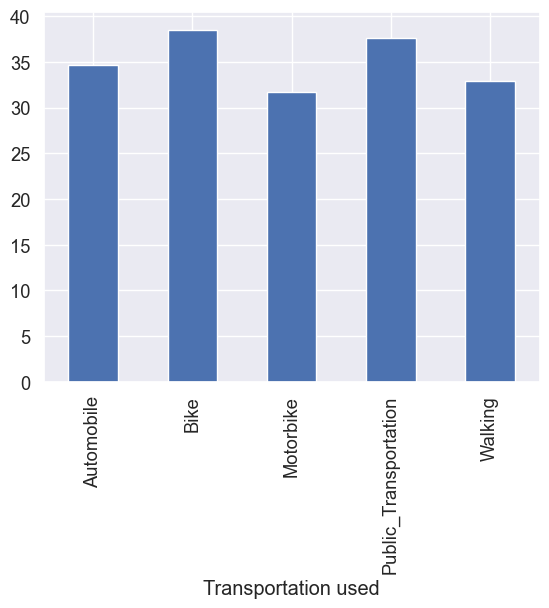

In [151]:
transport = obese_candidates_df.groupby(['Transportation used'])['BMI'].mean()
print(transport)
transport.plot(kind='bar')

Transportation used
Automobile               34.683010
Bike                     38.500000
Motorbike                31.733333
Public_Transportation    37.615526
Walking                  32.900000
Name: BMI, dtype: float64


AttributeError: Rectangle.set() got an unexpected keyword argument 'colors'

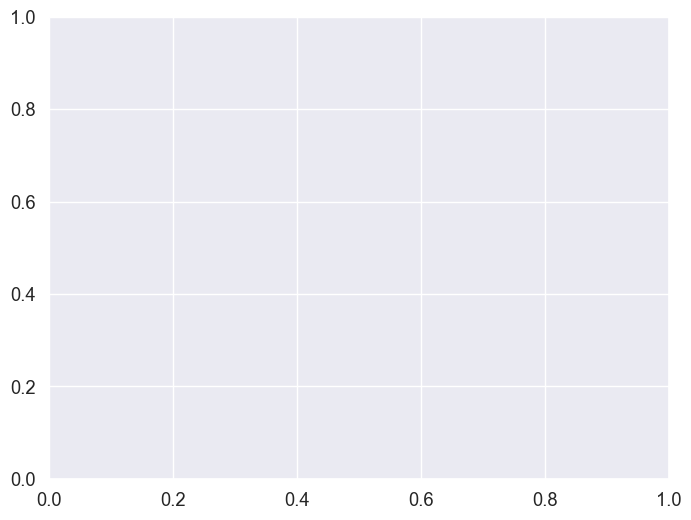

In [149]:



# Create a figure and axis
plt.figure(figsize=(8, 6))

# Define colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple']

transport = obese_candidates_df.groupby(['Transportation used'])['BMI'].mean()
print(transport)

# Create the bar plot with different colors for each bar
transport.plot(kind='bar', colors='colors')
#plt.bar(transport.index, transport[1], color=colors)

# Add labels and title
plt.xlabel('Transportation used', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.title('BMI vs Transportation used')
plt.legend()

# Show the plot
plt.show()

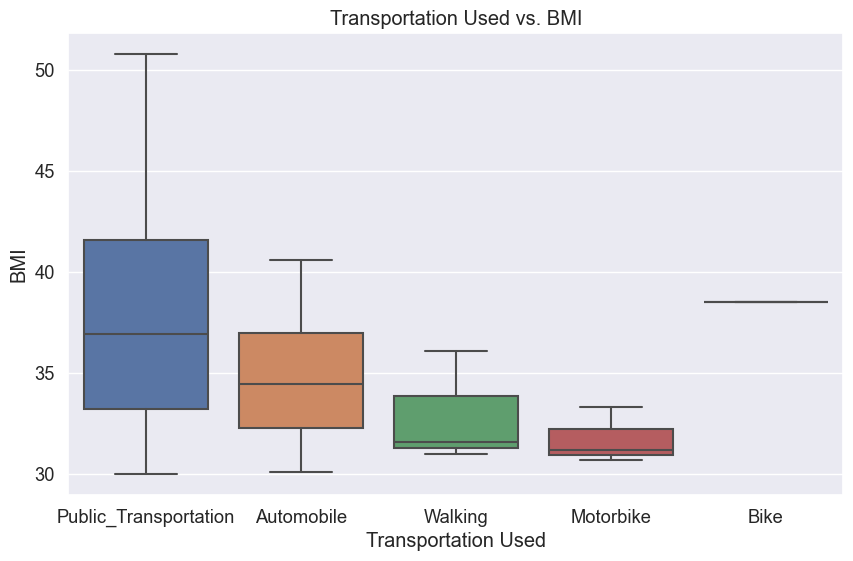

Boxplot Statistics:
Median: Transportation used
Automobile               34.45
Bike                     38.50
Motorbike                31.20
Public_Transportation    36.95
Walking                  31.60
Name: BMI, dtype: float64
Q1 (25th percentile): 32.3
Q3 (75th percentile): 37.0
Whiskers (min, max): Transportation used
Automobile               30.1
Bike                     38.5
Motorbike                30.7
Public_Transportation    30.0
Walking                  31.0
Name: BMI, dtype: float64 Transportation used
Automobile               40.6
Bike                     38.5
Motorbike                33.3
Public_Transportation    50.8
Walking                  36.1
Name: BMI, dtype: float64


C:\Users\lsemp\AppData\Local\Temp\ipykernel_9432\130686095.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Q1 (25th percentile):", boxplot_stats[1][0])  # Access Q1 from the tuple
C:\Users\lsemp\AppData\Local\Temp\ipykernel_9432\130686095.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Q3 (75th percentile):", boxplot_stats[1][1])  # Access Q3 from the tuple
